#### Project Introduction

In this project, we will try and use data to predict whether or not a new patient is likely to develop a heart condition.

#### Global Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=999
pd.options.display.max_columns=999

#### Data Set

In [2]:
df = pd.read_csv('heart_disease_prediction.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['HeartDisease'].value_counts(normalize=True) #% of patients in dataset with or without heart disease

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [30]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

#### EDA

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Seems like the min for RestingBP and Cholestrol are 0, which does not sound right. Let us dig deeper.

In [10]:
df[(df['RestingBP']==0) | (df['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1
299,47,M,ASY,110,0,1,ST,149,N,2.1,Up,1
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1


In [11]:
(df['Cholesterol']==0).sum()

172

In [12]:
(df['RestingBP']==0).sum()

1

For RestingBP, we'll just drop the one row. For Cholesterol, we will use a more nuanced approach.

In [43]:
df = df[df['RestingBP']!=0]
(df['RestingBP']==0).sum()

0

In [52]:
df.loc[df['Cholesterol']==0,'Cholesterol']=np.nan #treating the 0s as null values

In [53]:
df['Cholesterol'].isnull().sum()

171

We will come back to dealing with the null rows in Cholesterol once we get into making predictions

<AxesSubplot:ylabel='Frequency'>

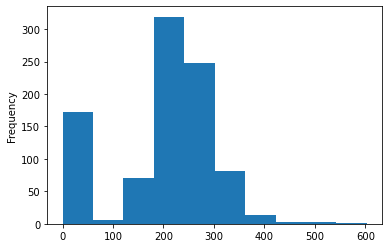

In [13]:
df['Cholesterol'].plot.hist()

It looks like the cholesterol column has a large number of rows with a value of 0. We will have to come back to this.

**Determining Distributions**

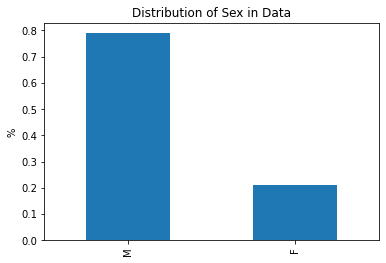

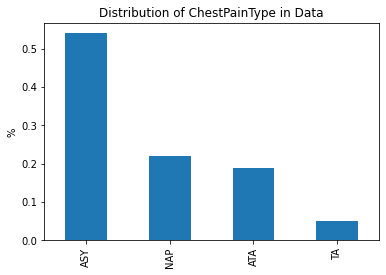

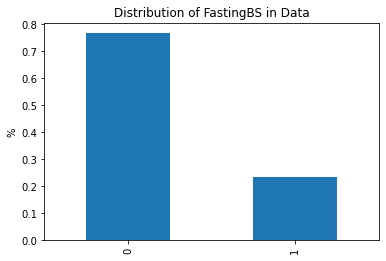

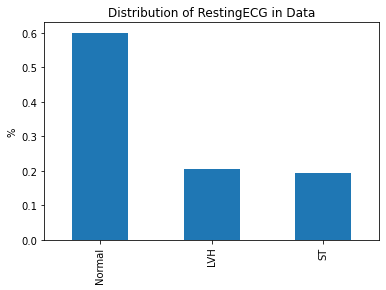

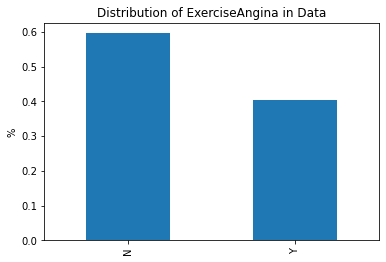

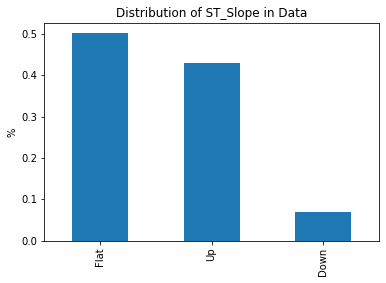

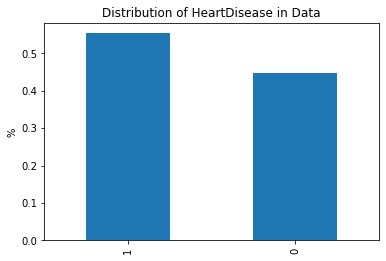

In [28]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for c in cat_cols:
    df[c].value_counts(normalize=True).plot.bar()
    plt.title(f'Distribution of {c} in Data')
    plt.ylabel('%')
    plt.show()

**Group Bar Plots to Highlight Relationship with Heart Disease Column**

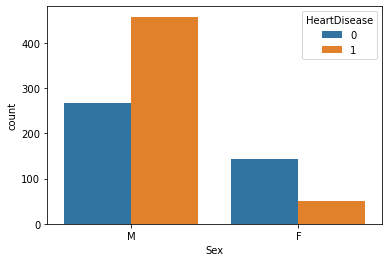

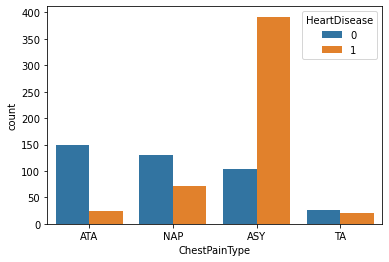

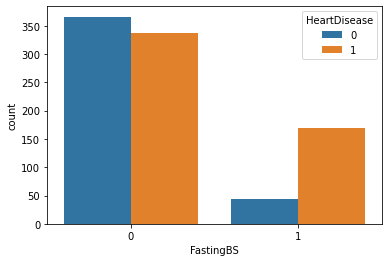

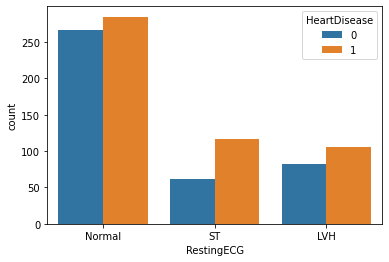

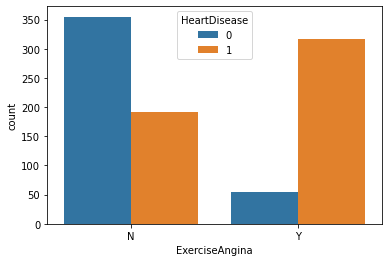

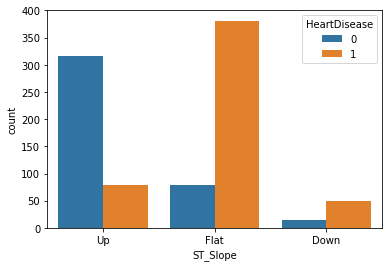

In [32]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for c in cat_cols:
    sns.countplot(x=c, hue='HeartDisease', data=df)
    plt.show()

In [35]:
df[(df['Sex']=='M') & ((df['Age']>=50))]['HeartDisease'].value_counts(normalize=True) 

1    0.70495
0    0.29505
Name: HeartDisease, dtype: float64

70% of the males above 50 in our dataset have heart disease

In [38]:
df[df['HeartDisease']==1]['Age'].median()

57.0

This is the median age of people who were diagnosed with heart disease

**Histograms for Continuous Variables Relationship with Heart Disease Column**

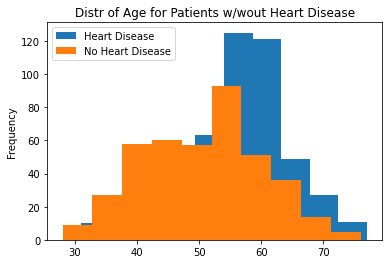

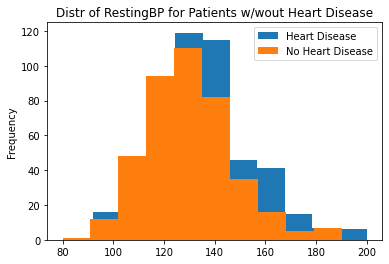

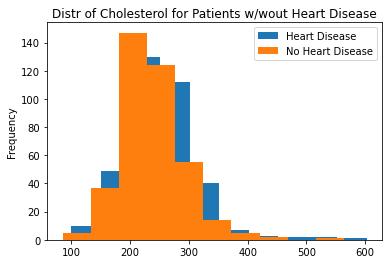

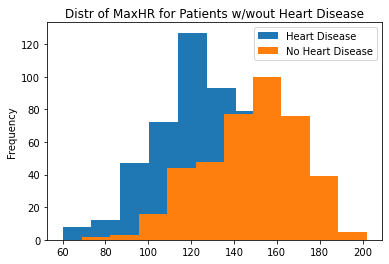

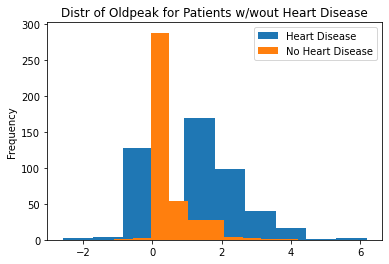

In [65]:
num_cols = ['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']

for c in num_cols:
    df[df['HeartDisease']==1][c].plot.hist(label='Heart Disease')
    df[df['HeartDisease']==0][c].plot.hist(label='No Heart Disease')
    plt.title(f'Distr of {c} for Patients w/wout Heart Disease')
    plt.legend()
    plt.show()

#### Feature Selection

In [67]:
df_ml = df.copy()

In [82]:
df_ml.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol        float64
FastingBS         category
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
dtype: object

In [81]:
df_ml['FastingBS'] = df_ml['FastingBS'].astype('category')

In [83]:
predictors = ['Age','MaxHR', 'Cholesterol', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']

In [86]:
df_ml = pd.concat([pd.get_dummies(df_ml[predictors],drop_first=True),df_ml['HeartDisease']], axis=1)

In [87]:
df_ml

,Age,MaxHR,Cholesterol,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,172,289.0,1,1,0,0,0,0,0,1,0
1,49,156,180.0,0,0,1,0,0,0,1,0,1
2,37,98,283.0,1,1,0,0,0,0,0,1,0
3,48,108,214.0,0,0,0,0,0,1,1,0,1
4,54,122,195.0,1,0,1,0,0,0,0,1,0
5,39,170,339.0,1,0,1,0,0,0,0,1,0
6,45,170,237.0,0,1,0,0,0,0,0,1,0
7,54,142,208.0,1,1,0,0,0,0,0,1,0
8,37,130,207.0,1,0,0,0,0,1,1,0,1
9,48,120,284.0,0,1,0,0,0,0,0,1,0


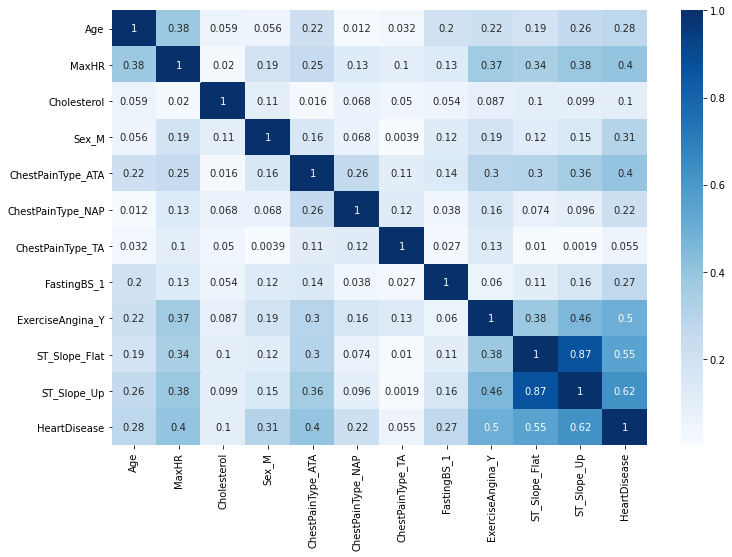

In [156]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df_ml.corr()), annot=True, cmap='Blues')
plt.show()

In [90]:
df_ml.corr()['HeartDisease'].sort_values()

ST_Slope_Up         -0.621843
ChestPainType_ATA   -0.401680
MaxHR               -0.401410
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
Cholesterol          0.103866
FastingBS_1          0.267994
Age                  0.282012
Sex_M                0.305118
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [91]:
#Imputing the Cholesterol column
df_ml.loc[df_ml['Cholesterol']==0,'Cholesterol'] = np.nan

In [92]:
df_ml.isnull().sum()

Age                    0
MaxHR                  0
Cholesterol          171
Sex_M                  0
ChestPainType_ATA      0
ChestPainType_NAP      0
ChestPainType_TA       0
FastingBS_1            0
ExerciseAngina_Y       0
ST_Slope_Flat          0
ST_Slope_Up            0
HeartDisease           0
dtype: int64

In [93]:
from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)
imp_df_ml = imp.fit_transform(df_ml)

In [102]:
imp_df_ml = pd.DataFrame(data=imp_df_ml, columns=df_ml.columns)

In [130]:
imp_df_ml.head()

,Age,MaxHR,Cholesterol,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40.0,172.0,289.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49.0,156.0,180.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,37.0,98.0,283.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,48.0,108.0,214.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,54.0,122.0,195.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Making Predictions

In [161]:
#Predictors anD Target
x = imp_df_ml[imp_df_ml.columns.drop('HeartDisease')]
y = imp_df_ml['HeartDisease']

#Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

#Standardizing the Predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Standardizing Training Predictors
stan_xtrain = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(stan_xtrain, columns=xtrain.columns)

#Standardizing Test Predictors (without fitting)
stan_xtest = scaler.transform(xtest)
xtest = pd.DataFrame(stan_xtest, columns=xtest.columns)

**(1) KNN**

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors': range(1,20,2),
    'weights': ['distance','uniform'],
    'algorithm': ['brute'],
    'p':[1,2]
}

#Grid Search for Hypeparameter Tuning on Training Data Only
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=5)
grid.fit(xtrain, ytrain) #hyperparameter tuning done only on training data, using cross validation. Not test set.

best_params = grid.best_params_
best_score = grid.best_score_

print(f'KNN Accuracy on Training Data: {best_score}')

#Making Predictions on Test (Holdout)
predictions = grid.best_estimator_.predict(xtest)
test_accuracy = accuracy_score(ytest, predictions)

print(f'KNN Accuracy on Test Data: {test_accuracy}')

KNN Accuracy on Training Data: 0.8526605162612991
KNN Accuracy on Test Data: 0.8478260869565217


**(2) Logistic Regression**

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

hyperparameters = {
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

#Grid Search for Hypeparameter Tuning on Training Data Only
grid = GridSearchCV(lr, param_grid=hyperparameters, cv=5)
grid.fit(xtrain, ytrain) #hyperparameter tuning done only on training data, using cross validation. Not test set.

best_params = grid.best_params_
best_score = grid.best_score_

print(f'Log Regression Accuracy on Training Data: {best_score}')

#Making Predictions on Test (Holdout)
predictions = grid.best_estimator_.predict(xtest)
test_accuracy = accuracy_score(ytest, predictions)

print(f'Log Regression Accuracy on Test Data: {test_accuracy}')

Log Regression Accuracy on Training Data: 0.8513186096356351
Log Regression Accuracy on Test Data: 0.8695652173913043


**(3) Random Forest**

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

hyperparameters = {
    'n_estimators': range(50,300,50)
#     'criterion': ['gini','entropy','log_loss']
}

#Grid Search for Hypeparameter Tuning on Training Data Only
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)
grid.fit(xtrain, ytrain) #hyperparameter tuning done only on training data, using cross validation. Not test set.

best_params = grid.best_params_
best_score = grid.best_score_

print(f'Random Forest Accuracy on Training Data: {best_score}')

#Making Predictions on Test (Holdout)
predictions = grid.best_estimator_.predict(xtest)
test_accuracy = accuracy_score(ytest, predictions)

print(f'Random Forest Accuracy on Test Data: {test_accuracy}')

Random Forest Accuracy on Training Data: 0.8485375786745649
Random Forest Accuracy on Test Data: 0.7989130434782609


**Testing out For Loop Approach**

In [191]:
#Predictors and Target
x = imp_df_ml[imp_df_ml.columns.drop('HeartDisease')]
y = imp_df_ml['HeartDisease']

#Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

#Standardizing the Predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Standardizing Training Predictors
stan_xtrain = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(stan_xtrain, columns=xtrain.columns)

#Standardizing Test Predictors (without fitting)
stan_xtest = scaler.transform(xtest)
xtest = pd.DataFrame(stan_xtest, columns=xtest.columns)

#Making Predictions Using Multiple Models and Parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()

models = [knn, lr, rf]

hyperparameters = {'knn':{'n_neighbors': range(1,20,2),
                          'weights': ['distance','uniform'],
                          'algorithm': ['brute'],
                          'p':[1,2]
                         },
                   'lr':{'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
                        },
                   'rf':{'n_estimators': range(50,300,50)
                        }
                  }

#Grid Search for Hypeparameter Tuning on Training Data Only

for model,hparams in zip(models, hyperparameters):

    grid = GridSearchCV(model, param_grid=hyperparameters[hparams], cv=5)
    grid.fit(xtrain, ytrain) #hyperparameter tuning done only on training data, using cross validation. Not test set.

    best_params = grid.best_params_
    best_score = grid.best_score_

    print(f'{model} Accuracy on Training Data: {best_score}')

    #Making Predictions on Test (Holdout)
    predictions = grid.best_estimator_.predict(xtest)
    test_accuracy = accuracy_score(ytest, predictions)

    print(f'{model} Accuracy on Test Data: {test_accuracy}')
    print(best_params)
    print('--- \n')

KNeighborsClassifier() Accuracy on Training Data: 0.8526605162612991
KNeighborsClassifier() Accuracy on Test Data: 0.8478260869565217
{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
--- 

LogisticRegression() Accuracy on Training Data: 0.8513186096356351
LogisticRegression() Accuracy on Test Data: 0.8695652173913043
{'solver': 'lbfgs'}
--- 

RandomForestClassifier() Accuracy on Training Data: 0.8417388873357563
RandomForestClassifier() Accuracy on Test Data: 0.8043478260869565
{'n_estimators': 50}
--- 

